<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina



#  Agrupamento

O objetivo de uma técnica de agrupamento é encontrar uma estrutura de **clusters (grupos)** nos dados em que os objetos pertencentes a cada cluster compartilham alguma característica ou propriedade relevante para o domínio do problema estudado, ou seja, **são de alguma maneira similares**.

Exemplos de Aplicação:
* Agrupamento de documentos
* Agrupamento de clientes
* Agrupamento de notícias

O exemplo abaixo mostra maneiras diferentes de agrupar os objetos, cada uma dessas maneiras é uma estrutura ou um modelo que descreve os dados e poderia ter sido obtida por meio de um algoritmo de agrupamento.


In [ ]:
from IPython.display import Image

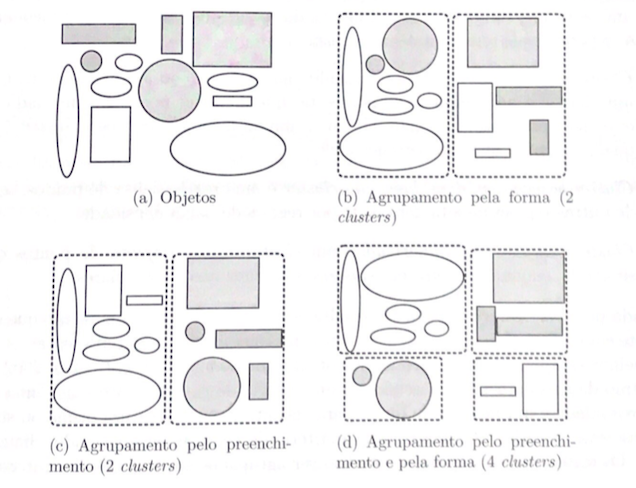

In [ ]:
Image('./img/clusters.png')

## Definições de cluster de acordo com as técnicas adotadas:

* **Cluster bem separado**: Um cluster é um conjunto de pontos tal que qualquer ponto de um cluster está mais próximo (ou é mais similar) a **cada outro ponto nesse cluster** do que a qualquer ponto não pertencente a ele;

* **Cluster baseado em centro**: Um cluster é um conjunto de pontos tal que qualquer ponto de um cluster está mais próximo (ou é mais similar) **ao centro desse cluster** do que ao centro de qualquer outro cluster. Onde o centro de um cluster pode ser a média aritmética dos pontos do cluster **(KMeans)**.

* **Cluster contínuo**: Um cluster é um conjunto de pontos tal que qualquer ponto de um cluster está mais próximo (ou é mais similar) **a um ou mais pontos nesse cluster** do que a qualquer ponto não pertencente a ele (vizinhos mais próximos)

* **Cluster baseado em densidade**: Um cluster é uma **região densa de pontos** separada de outras regiões densas por um região de baixa densidade (DBSCAN)

Cada possível definição resulta do critério de agrupamento adotado pelo modelo que essencialmente é uma forma de selecionar uma estrutura para representar os clusters que melhor se ajuste a um determinado conjunto de dados.

## Principais critérios de agrupamento:

* **Compactação**: A compactação ou homogeneidade do cluster é geralmente associada a uma variação intracluster pequena. Algoritmos que otimizam esse tipo de critério tendem a ser muito efetivos na descoberta de cluster esféricos e/ou bem separados, mas podem falhar para estruturas mais complexas.

* **Encadeamento ou ligação**: Baseado na ideia de que objetos vizinhos devem compartilhar o mesmo cluster. Esse tipo de critério é bastante apropriado para detecção de clusters de forma arbitrária, mas não é robusto para casos em que há pouca separação espacial entre os clusters.

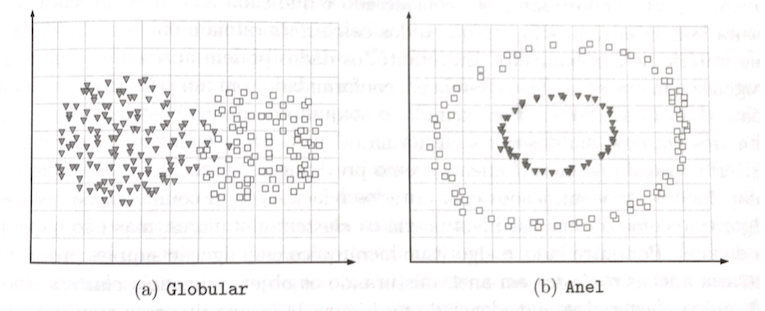

In [ ]:
Image('./img/globularAnel.png')

Ver mais sobre diferentes abordagens de agrupamento: https://scikit-learn.org/stable/modules/clustering.html#clustering

## Como decidir qual o número ideal de cluster para um determinado problema?

* **Conhecimento prévio de um especialista da área**
* **Conhecimento prévio do que se deseja encontrar nos dados**
* No caso de algoritmos baseados em compactação, como é o caso do kMeans, pode-se usar a análise da soma dos erros quadrados (SEQ), onde a **SEQ é o quadrado da distância entre cada ponto e seu centróide**. Dessa forma, o K ideal é aquele que minimiza o SEQ. No entanto, tem que se observar que quanto maior o K, menor o erro, porque ele vai tender a deixar cada exemplo em um cluster individual, dessa forma, usa-se o **método do cotovelo** para identificar o K ideal, sendo aquele onde o erro cai de modo mais significativo. Para usar o método do cotovelo plotamos em um gráfico o SEQ em função do K 

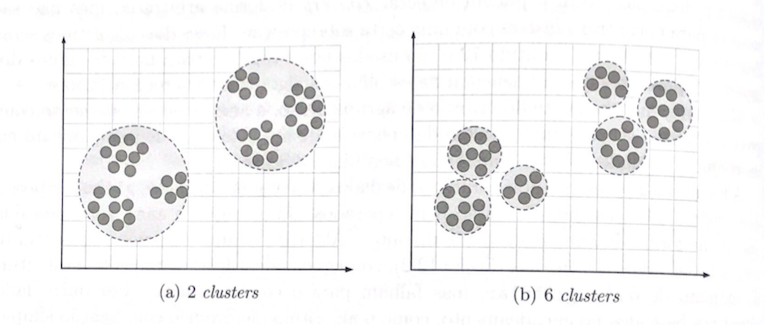

In [ ]:
Image('./img/qtdClusters.png')

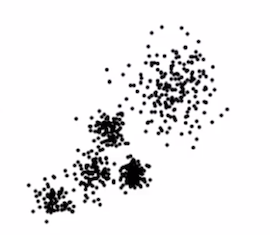

In [ ]:
Image('./img/objetos.png')

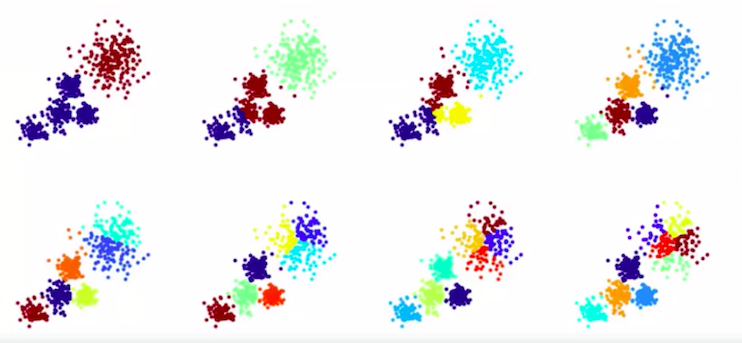

In [ ]:
Image('./img/qtdClusters2.png')

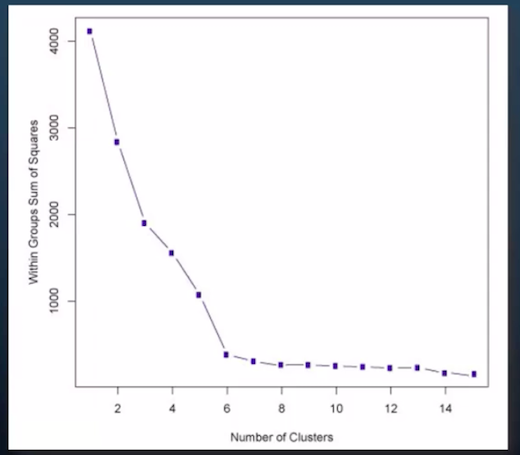

In [ ]:
Image('./img/cotovelo.png')

# K Means Clustering

K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. 

A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. 

No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. 

### Método usado

O algoritmo define aleatoriamente um objeto para ser o centróide de cada cluster, depois atribui cada objeto ao centróide mais próximo (métrica de distância). Então, o algoritmo itera através de duas etapas:

> Calcula o novo centróide de cada cluster (**ponto médio**) e Reatribui os objetos ao cluster cujo centroide é o mais próximo 

**Estes dois passos são repetidos até que a diferença entre o antigo e o novo centróide seja menor que um limite. Em outras palavras, ele se repete até que os centróides não se movam significativamente** 

### Atenção
O K-means  é altamente dependente da inicialização dos centróides. Um método para ajudar a resolver esse problema é o esquema de inicialização k-means++, que foi implementado no scikit-learn (parâmetro init='k-means++'). Isso inicializa os centróides para estar (geralmente) distantes um do outro, levando a resultados provavelmente melhores do que a inicialização aleatória.

## Importa bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Cria dados

In [ ]:
from sklearn.datasets import make_blobs #usado para criar dados quaisquer

In [ ]:
dadosrandom = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8) #random_state=101

In [ ]:
dadosrandom

(array([[  2.95064021,  -8.54348903],
        [  9.56420706,   3.06930161],
        [  6.4247943 ,   6.55572306],
        [  4.68233779, -10.14044122],
        [-10.47928419,  -3.68119154],
        [  2.71707765,  -5.12928937],
        [  0.87012183,  -9.03251106],
        [ 10.58805288,   5.59567625],
        [ -7.17962467, -12.39063198],
        [ -3.3647933 ,  -8.60319185],
        [  3.47145466,  -7.54833656],
        [ -3.68039791,  -8.61848382],
        [ -7.80469041,  -5.36416564],
        [ -4.64545676, -10.28831469],
        [  0.70311703,  -7.91240718],
        [ -2.09660488,  -8.62498122],
        [ -9.78942144,  -3.6026585 ],
        [ -4.58027975, -10.9052483 ],
        [ -9.39866618,  -7.22382269],
        [ -7.5912881 ,  -6.28859428],
        [  7.23399718,   5.93879145],
        [ -1.92673852,  -9.65838302],
        [  7.28697694,   6.95705141],
        [  8.75753499,   8.25462083],
        [ -9.94851037,  -3.6685266 ],
        [ -6.73384847,  -6.46602449],
        [ -0

In [ ]:
type(data)

tuple

## Visualizando os dados 


Plota as entradas (armazenadas em dado[0]), organizando os dados da coluna 0 no eixo x e os dados da coluna 1 no eixo y, aplicando cores em função das saídas (armazenadas em dado[1])

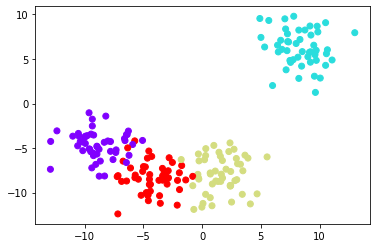

In [ ]:
plt.scatter(dadosrandom[0][:,0],dadosrandom[0][:,1],c=dadosrandom[1],cmap='rainbow')

## Criando os clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_dadosrandom = KMeans(n_clusters=4)

In [ ]:
kmeans_dadosrandom.fit(dadosrandom[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans_dadosrandom.cluster_centers_

array([[-4.17877977, -8.42904431],
       [ 8.39285819,  6.20625627],
       [ 1.61392382, -7.96621548],
       [-8.77210822, -4.63374489]])

In [ ]:
kmeans_dadosrandom.labels_

array([2, 1, 1, 2, 3, 2, 2, 1, 0, 0, 2, 0, 3, 0, 2, 0, 3, 0, 3, 3, 1, 0,
       1, 1, 3, 3, 2, 3, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 3, 1, 1, 3, 0, 0,
       0, 0, 1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 1, 3, 3, 2, 0, 1, 0, 3, 0, 0,
       3, 3, 1, 3, 2, 1, 1, 1, 2, 1, 0, 2, 2, 3, 2, 3, 2, 1, 1, 2, 1, 0,
       3, 1, 0, 3, 2, 3, 0, 3, 3, 3, 2, 1, 3, 3, 0, 3, 3, 1, 1, 2, 1, 2,
       0, 0, 2, 1, 3, 2, 2, 2, 3, 2, 0, 1, 1, 0, 1, 2, 0, 3, 1, 1, 2, 0,
       2, 0, 3, 0, 1, 1, 1, 0, 0, 2, 0, 3, 3, 2, 0, 0, 0, 1, 2, 3, 3, 0,
       2, 1, 2, 0, 1, 1, 3, 2, 2, 2, 2, 1, 1, 0, 3, 2, 0, 1, 3, 3, 1, 3,
       0, 2, 0, 1, 3, 3, 2, 2, 1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 0], dtype=int32)

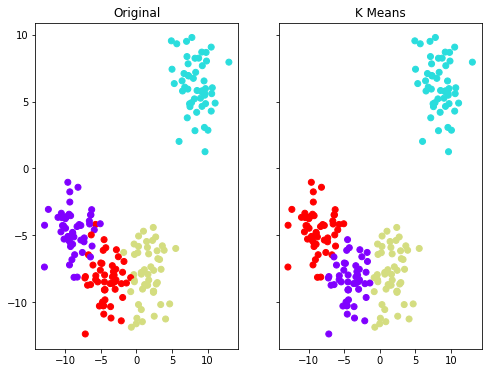

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))

ax1.set_title("Original")
ax1.scatter(dadosrandom[0][:,0],dadosrandom[0][:,1],c=dadosrandom[1],cmap='rainbow') #Original

ax2.set_title('K Means')
ax2.scatter(dadosrandom[0][:,0],dadosrandom[0][:,1],c=kmeans_dadosrandom.labels_,cmap='rainbow') #gerado pelo kMeans

Você deve notar que as cores não têm relação com o conjunto em si, assim como o rótulo não será necessariamente o mesmo que está no dataset original (por isso, não devemos usar o método de acurácia para calcular percentual de acerto)

Uma métrica para avaliar a qualidade do agrupamento é o índice Rand que mede a similaridade das duas rotulagens (original e do cluster), ignorando as permutações, ou seja, ele verifica o percentual de vezes que pares de amostras estão nos mesmos conjuntos tanto na base original, quanto no agrupamento feito, bem como pares de amostras nunca estão nos mesmos conjuntos tanto na base original, quanto no agrupamento feito

https://davetang.org/muse/2017/09/21/the-rand-index/

In [ ]:
from sklearn import metrics

metrics.adjusted_rand_score(dadosrandom[1], kmeans_dadosrandom.labels_)

0.9223165878221223

### Exemplo para escolha do k (quando não há especialista ou não se sabe quantos grupos se quer)

**Método do Cotovelo**

In [ ]:
import pandas as pd

In [ ]:
seq = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dadosrandom[0])
    seq[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

**Inércia**: Soma dos quadrados dentro do cluster (distância de cada amostra para o centróide). Indica quão internamente os clusters são coerentes.

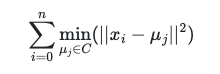

In [ ]:
Image('./img/inercia.png')

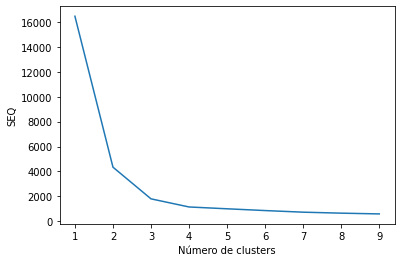

In [ ]:
plt.figure()
plt.plot(list(seq.keys()), list(seq.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SEQ")
plt.show()

Observe pelo resultado do gráfico, que o método do cotovelo encontra como número ideal de clusters: 4!

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
seq = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris.data)
    seq[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

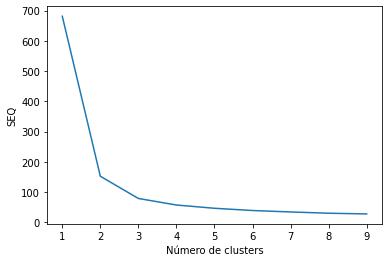

In [ ]:
plt.figure()
plt.plot(list(seq.keys()), list(seq.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SEQ")
plt.show()

In [ ]:
kmeans_iris = KMeans(n_clusters=3).fit(iris.data)

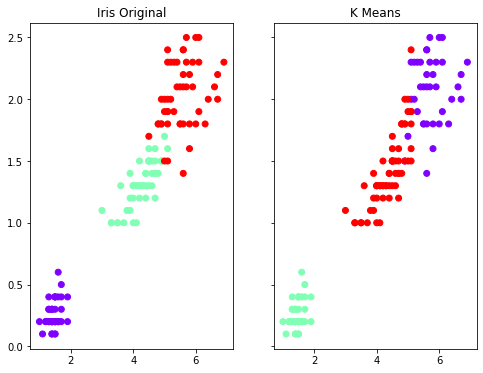

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8,6))

ax1.set_title("Iris Original")
ax1.scatter(iris.data[:, 2],iris.data[:, 3], c=iris.target,cmap='rainbow') #Original

ax2.set_title('K Means')
ax2.scatter(iris.data[:, 2],iris.data[:, 3],c=kmeans_iris.labels_,cmap='rainbow') #gerado pelo kMeans

In [ ]:
metrics.adjusted_rand_score(iris.target, kmeans_iris.labels_)

0.7302382722834697